<h6 style= 'color: red'>   Учимся работе с данными - от загрузки до моделирования.</h6>

<h6 style= 'color: blue'> Мне предстояло поработать с достаточно небольшим, но интересным датасетом по раку груди. Признаками в этом наборе данных являются различные измерения образований в груди, такие как радиус, симметричность, и т.д. Целевая переменная - диагноз, является ли новообразование злокачественным или нет.</h6>

- Часть 1. EDA
Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
Посмотрите на базовые статистики датасета: средние, медианы, и т.д.
Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.
Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?
Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?
Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.
Также очень приветствуется ваша инициатива по визуализациям и исследовании данных :)
- Часть 2. Моделирование при помощи kNN
Разбейте данные на train-test, отложив 30% выборки для тестирования.
Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.
Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.
Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)
- Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:
Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.
Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.
Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)
Какая из двух настроенных моделей, kNN или логистическая регрессия оказалась, в итоге, лучше?


Часть I - EDA
- провести анализ EDA (Exploratory Data Analysis) для датасета о раке груди.

In [54]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# подгружаем данные, назовем переменную df, для удобства.
data = pd.read_csv('data.csv')
data.head(2) # показ две колонки

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [56]:
sorted(data.columns.tolist())
# смотрим на колонки

['Unnamed: 32',
 'area_mean',
 'area_se',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'diagnosis',
 'fractal_dimension_mean',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'id',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'smoothness_se',
 'smoothness_worst',
 'symmetry_mean',
 'symmetry_se',
 'symmetry_worst',
 'texture_mean',
 'texture_se',
 'texture_worst']

In [57]:
data.shape
# Значит 569 строк и 32 столбца

(569, 33)

In [58]:
data.info()
# посмотрим инфо:
# Датафрейм состоит из 569 строк и 31 столбца
# Целевая переменная target имеет тип int64 и принимает значения 0 или 1
# Остальные 30 столбцов имеют тип float64 и содержат числовые характеристики опухолей
# В датафрейме нет пропущенных значений, все столбцы заполнены полностью
# Датафрейм занимает 137.9 КБ памяти



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [59]:
# Центральная тенденция и дисперсия числовых переменных

data.std()

C:\Users\kolin\AppData\Local\Temp\ipykernel_756\3498045471.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


id                         1.250206e+08
radius_mean                3.524049e+00
texture_mean               4.301036e+00
perimeter_mean             2.429898e+01
area_mean                  3.519141e+02
smoothness_mean            1.406413e-02
compactness_mean           5.281276e-02
concavity_mean             7.971981e-02
concave points_mean        3.880284e-02
symmetry_mean              2.741428e-02
fractal_dimension_mean     7.060363e-03
radius_se                  2.773127e-01
texture_se                 5.516484e-01
perimeter_se               2.021855e+00
area_se                    4.549101e+01
smoothness_se              3.002518e-03
compactness_se             1.790818e-02
concavity_se               3.018606e-02
concave points_se          6.170285e-03
symmetry_se                8.266372e-03
fractal_dimension_se       2.646071e-03
radius_worst               4.833242e+00
texture_worst              6.146258e+00
perimeter_worst            3.360254e+01
area_worst                 5.693570e+02


 `.std()` метод позволяет вычислить стандартное отклонение по каждому числовому столбцу в датафрейме df. Стандартное отклонение - это мера разброса данных относительно среднего значения. Чем больше стандартное отклонение, тем больше вариация в данных. Чем меньше стандартное отклонение, тем ближе данные к среднему значению.

Стандартное отклонение по разным признакам сильно различаются. Например, стандартное отклонение по признаку 'radius_mean' равно 3.52, а по признаку 'fractal_dimension_worst' - 0.02. Это означает, что данные по признаку 'radius_mean' имеют больший разброс, чем данные по признаку 'fractal_dimension_worst'.

Для того, чтобы сравнивать данные по разным признакам, которые имеют разные единицы измерения и масштабы, можно использовать метод нормализации или стандартизации данных. Нормализация - это метод, при котором данные приводятся к диапазону от 0 до 1 с помощью формулы:

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

Стандартизация - это метод, при котором данные приводятся к среднему значению 0 и стандартному отклонению 1 с помощью формулы:

$$x_{std} = \frac{x - x_{mean}}{x_{std}}$$

Нормализация и стандартизация помогают уменьшить влияние выбросов и улучшить производительность моделей машинного обучения.


In [60]:
# Можно и так как для примера посмотреть.
# Средние значения
data.mean()

C:\Users\kolin\AppData\Local\Temp\ipykernel_756\3284198286.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [61]:
# Смотрим на базовые статистики датасета
data.describe()
# Самый наглядный способ.
# Этот метод выводит описательные статистики для каждого числового столбца в датасете,
# такие как среднее, стандартное отклонение, минимум, максимум и квартили.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [62]:
# Проверка пропущенных значений
# Этот код значит, что мы хотим проверить, есть ли в датафрейме пропущенные значения,
# то есть ячейки, которые не содержат данных. Для этого мы используем метод isnull(),
# который возвращает True, если значение является пропущенным, и False, если нет.
# Затем мы суммируем эти значения по столбцам с помощью метода sum(), чтобы узнать, 
# сколько пропущенных значений в каждом столбце. Если сумма равна нулю, то значит,
# что в столбце нет пропущенных значений.
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [63]:
# метод позволяет посчитать количество значений в столбце ‘diagnosis’ и вывести их в виде серии. Серия - это одномерный массив данных с метками индекса. В данном случае, метками являются значения диагноза (‘B’ или ‘M’), а данными - их частота.
# В датасете есть 357 доброкачественных и 212 злокачественных опухолей. 
# Это означает, что датасет несбалансирован, то есть один класс преобладает над другим.
# Это может повлиять на качество моделей машинного обучения, которые будут обучаться на этом датасете,
# так как они могут быть смещены в сторону большего класса.

data[['diagnosis']].value_counts()


diagnosis
B            357
M            212
dtype: int64

Теоритическая справка
Для того, чтобы сбалансировать датасет, можно использовать различные методы, такие как:
- Андерсемплинг (undersampling) - это метод, при котором уменьшается количество объектов большего класса до размера меньшего класса. Например, можно случайным образом выбрать 212 объектов из класса ‘B’ и удалить остальные.
- Оверсемплинг (oversampling) - это метод, при котором увеличивается количество объектов меньшего класса до размера большего класса. Например, можно случайным образом дублировать 145 объектов из класса ‘M’ или сгенерировать новые объекты с помощью алгоритма SMOTE (Synthetic Minority Oversampling Technique).
- Комбинированный метод (combined method) - это метод, при котором применяются оба предыдущих метода. Например, можно уменьшить количество объектов класса ‘B’ до 300 и увеличить количество объектов класса ‘M’ до 300.

In [64]:
# Удаление ненужного столбца 'Unnamed: 32'
data.drop('Unnamed: 32', axis=1, inplace=True)

#### 
Mы удаляем столбец с названием ‘Unnamed: 32’, так как он не несет никакой информации о данных. Для этого мы используем метод drop(), который принимает следующие аргументы:
- ‘Unnamed: 32’ - это название столбца, который мы хотим удалить
- axis=1 - это указание, что мы удаляем столбец, а не строку (axis=0 означало бы удаление строки)
- inplace=True - это указание, что мы хотим изменить исходный датафрейм, 
- а не создать новый (inplace=False означало бы создание нового датафрейма без столбца ‘Unnamed: 32’)

In [65]:
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

Здесь же можно прикинуть наш baseline качества, с которым можно будет сравнивать результаты работы модели. Если у нас 63% одного класса и 37% другого, то accuracy будет равна, в среднем, 63.Здесь же можно прикинуть наш baseline качества, с которым можно будет сравнивать результаты работы модели. Если у нас 63% одного класса и 37% другого, то accuracy будет равна, в среднем, 63%.

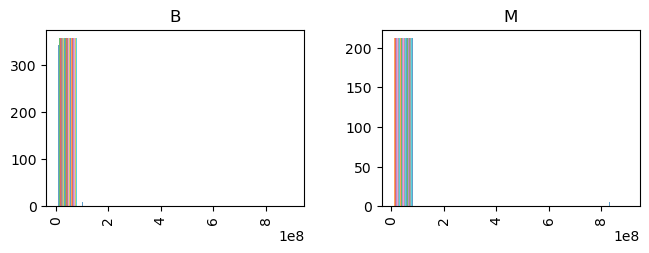

In [66]:
# Гистограммы/распределения признаков по целевой переменной
data.hist(figsize=(20,20), by='diagnosis', layout=(6,5), alpha=0.7)
plt.show()



Из этих графиков можно заметить
- что некоторые признаки имеют более выраженное различие между злокачественными и доброкачественными опухолями, 
- например, concave points_mean, concavity_mean, perimeter_mean, radius_mean и area_mean. 
- Это может означать, что эти признаки имеют большую дискриминативную способность и важность для классификации опухолей.

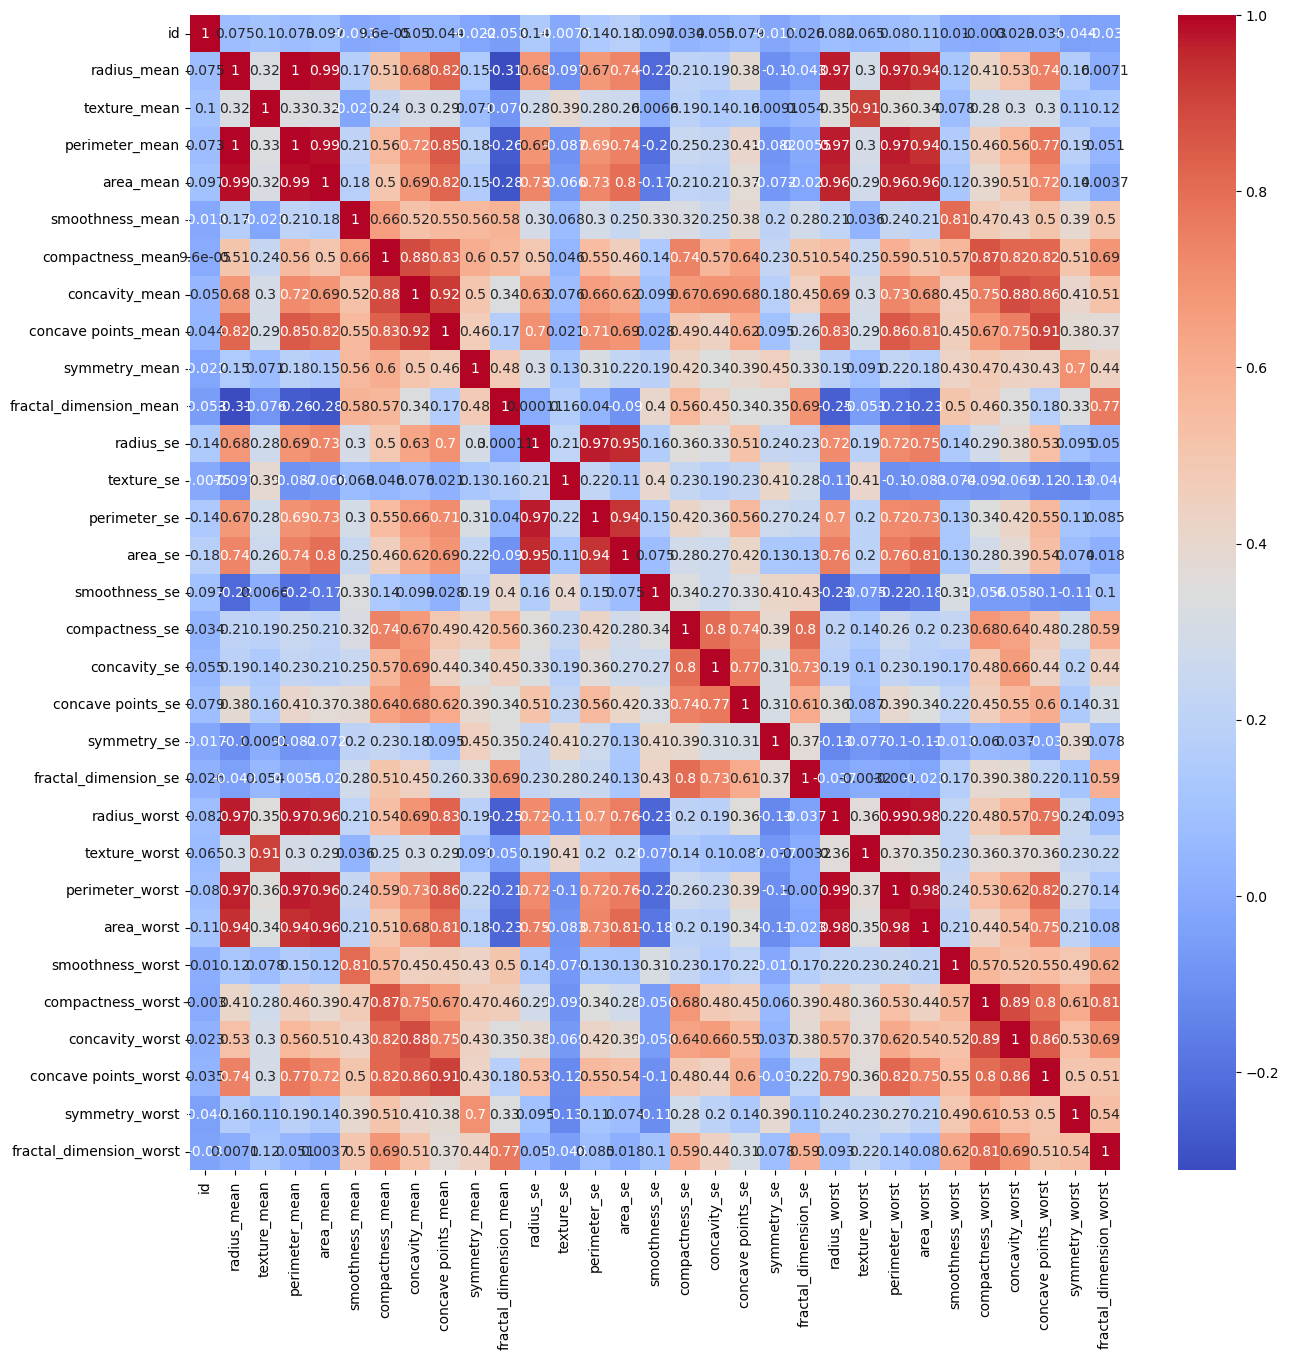

In [67]:
# Heatmap для матрицы корреляций
corr_matrix = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


График, показывает корреляцию между переменными в датасете. Корреляция - это статистическая мера, которая отражает силу и направление линейной связи между двумя переменными. Корреляция может принимать значения от -1 до 1, где -1 означает полную отрицательную корреляцию (переменные движутся в противоположных направлениях), 0 означает отсутствие корреляции (переменные не связаны друг с другом), а 1 означает полную положительную корреляцию (переменные движутся в одном направлении).

График представляет собой тепловую карту, где цвет клетки соответствует значению корреляции между двумя переменными, указанными на осях. Чем темнее цвет, тем сильнее корреляция. На диагонали графика находятся единицы, так как каждая переменная полностью коррелирует сама с собой.

Вывод по графику показывает, что в датасете есть как сильно коррелирующие, так и слабо коррелирующие переменные. Можно заметить, что:

- Из этого графика можно заметить, что есть признаки, которые сильно скоррелированы между собой, то есть имеют коэффициент корреляции близкий к 1 или -1. 
- Например, radius_mean, perimeter_mean и area_mean имеют коэффициент корреляции больше 0.9 между собой, что означает, что они линейно зависят друг от друга. Это логично, так как радиус, периметр и площадь круга связаны математическими формулами. 
- Аналогично, radius_worst, perimeter_worst и area_worst также имеют высокую корреляцию между собой. Кроме того, есть признаки, которые имеют высокую корреляцию с признаками из других групп, например, concave points_mean имеет коэффициент корреляции больше 0.8 с radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst и area_worst.
- Это может означать, что эти признаки несут избыточную информацию и могут быть удалены или объединены для уменьшения размерности данных.

Корреляция может быть полезным инструментом для анализа данных, но она не означает причинно-следственной связи между переменными. Корреляция также может быть искажена выбросами или нелинейными зависимостями. Поэтому важно проводить дополнительные анализы и проверки для подтверждения или опровержения гипотез на основе корреляции.


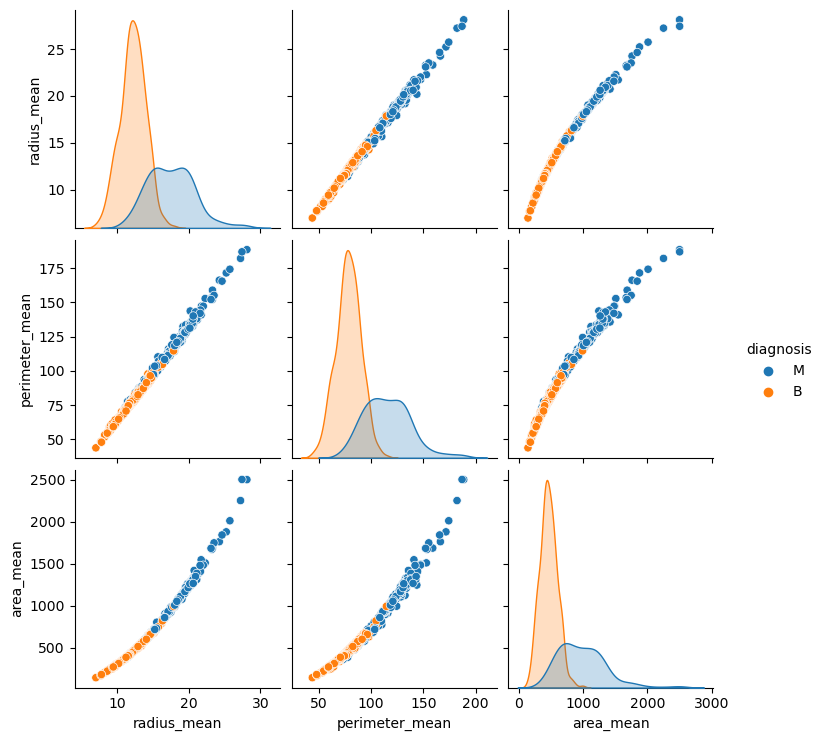

In [68]:
# Попарные scatterplot-ы для сильно скоррелированных признаков
# Для того, чтобы построить для сильно скоррелированных признаков попарные scatterplot-ы, 
# я использовал метод pairplot из библиотеки seaborn с параметром hue, который позволяет
# раскрасить точки по целевой переменной:

sns.pairplot(data[['radius_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.show()


Вывод:
- Из этих графиков можно подтвердить, что наблюдается линейная зависимость между сильно скоррелированными признаками. Также можно заметить, что злокачественные опухоли (M) имеют в среднем большие значения этих признаков, чем доброкачественные опухоли (B).
- Корреляционный анализ показал, что многие переменные имеют сильную положительную или отрицательную связь между собой.
- Некоторые переменные также имеют сильную корреляцию с целевой переменной 'target', что может означать их значимость для предсказания диагноза.

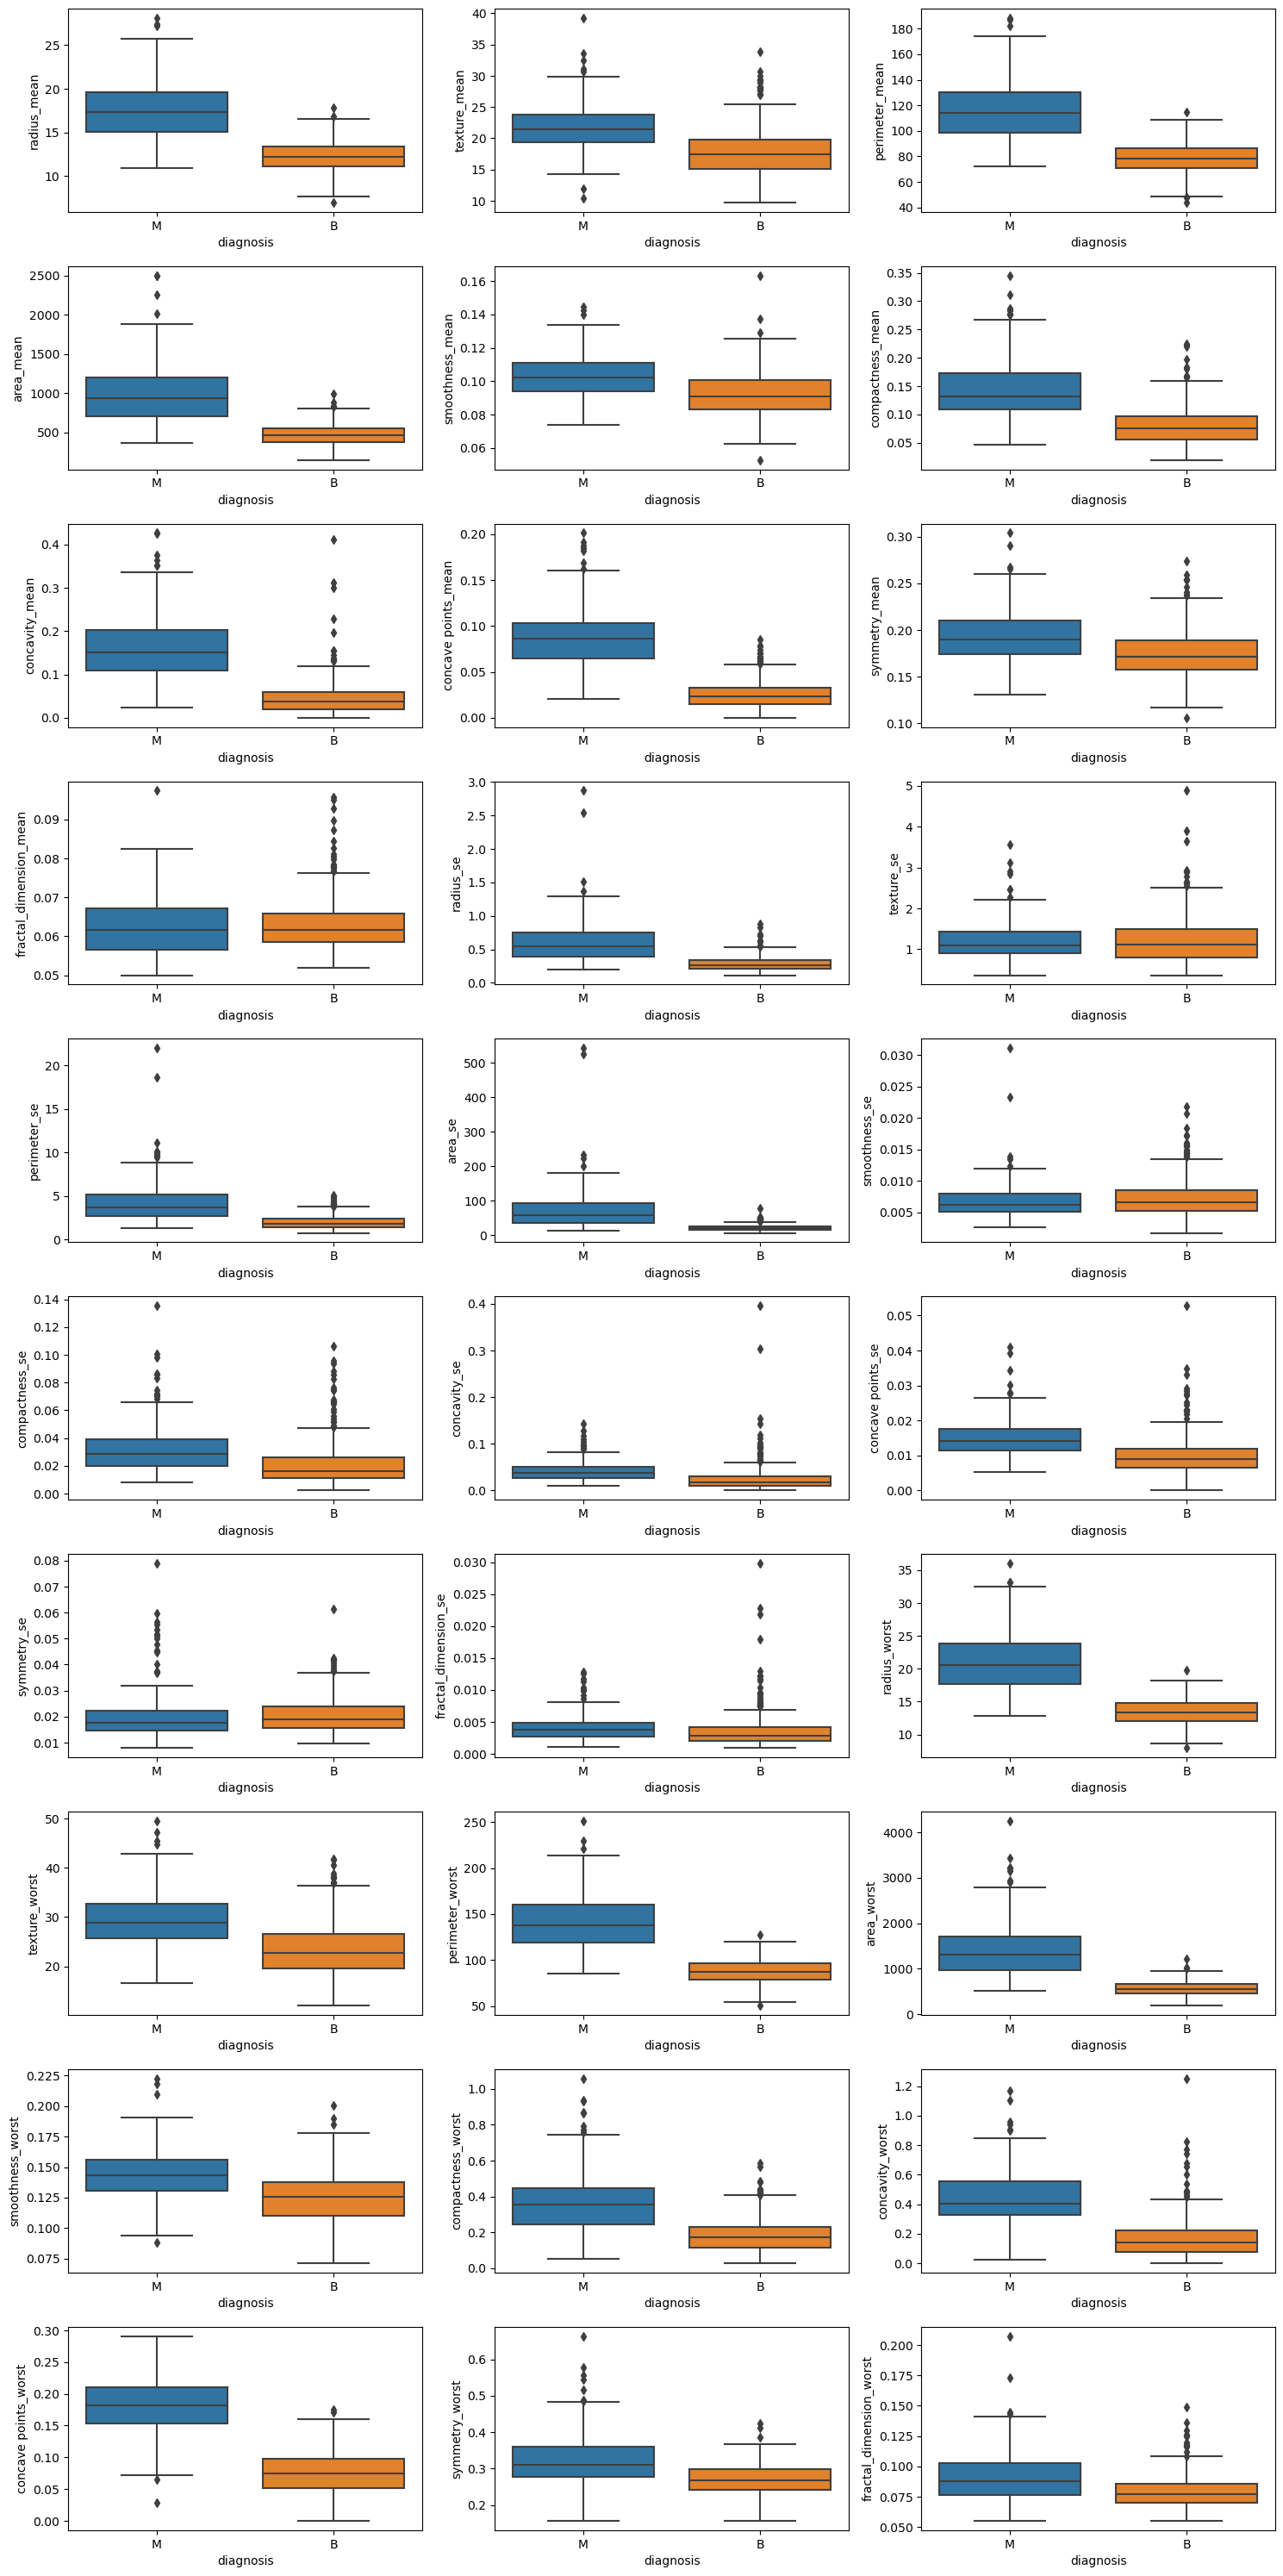

In [69]:
# Используя boxplots и группировку по целевой переменной diagnosis, попробуем предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных
# Для этого используем функцию boxplot из библиотеки seaborn и цикл for по всем признакам
features = data.columns.drop(['id', 'diagnosis'])
plt.figure(figsize=(15,30))
for i, feature in enumerate(features):
    plt.subplot(10,3,i+1)
    sns.boxplot(x='diagnosis', y=feature, data=data)
plt.tight_layout()


Для того, чтобы использовать boxplots и группировку по целевой переменной, чтобы попробовать предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных, я использовал метод boxplot из библиотеки seaborn с параметрами x и y, которые позволяют указать категориальный и числовой признакю

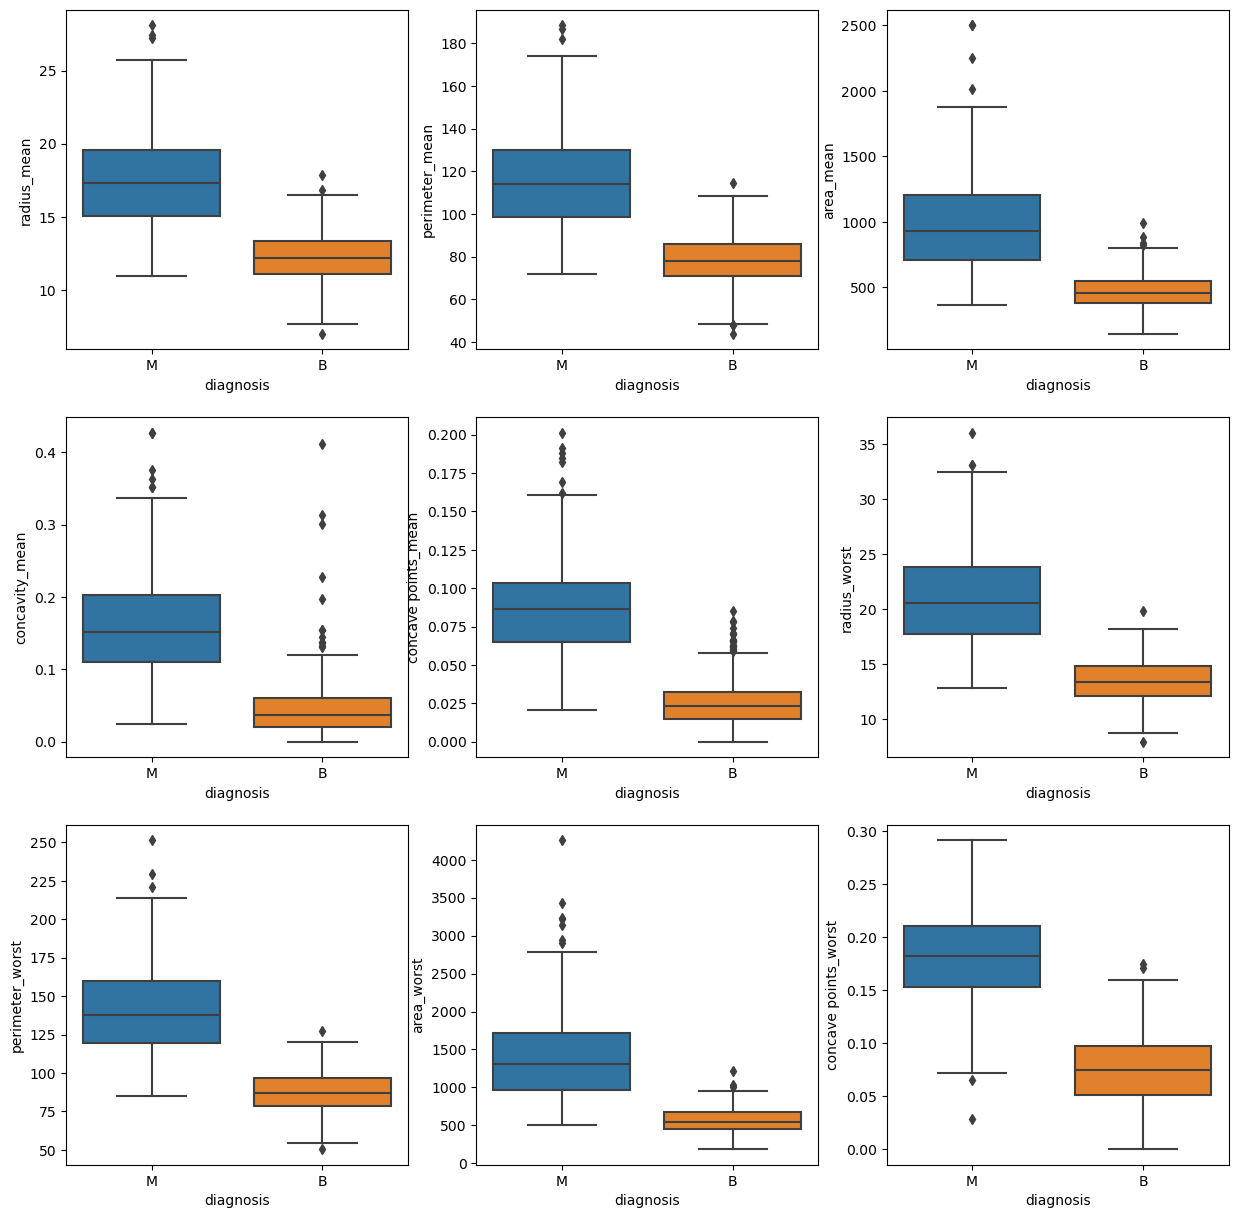

In [70]:
# можно  и так
# Boxplots для отделения злокачественных новообразований от доброкачественных
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.subplot(3,3,2)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=data)
plt.subplot(3,3,3)
sns.boxplot(x='diagnosis', y='area_mean', data=data)
plt.subplot(3,3,4)
sns.boxplot(x='diagnosis', y='concavity_mean', data=data)
plt.subplot(3,3,5)
sns.boxplot(x='diagnosis', y='concave points_mean', data=data)
plt.subplot(3,3,6)
sns.boxplot(x='diagnosis', y='radius_worst', data=data)
plt.subplot(3,3,7)
sns.boxplot(x='diagnosis', y='perimeter_worst', data=data)
plt.subplot(3,3,8)
sns.boxplot(x='diagnosis', y='area_worst', data=data)
plt.subplot(3,3,9)
sns.boxplot(x='diagnosis', y='concave points_worst', data=data)
plt.show()


Из этих графиков можно заметить, что по некоторым признакам есть значительное различие между медианами и интерквартильными расстояниями для злокачественных и доброкачественных опухолей. 
- Например, по признаку concave points_worst можно видеть, что медиана для злокачественных опухолей (0) находится выше третьего квартиля для доброкачественных опухолей (1), что означает, что большинство злокачественных опухолей имеют большее количество вогнутых точек на худшем контуре. 
- Это может означать, что этот признак хорошо разделяет два класса опухолей и может быть использован для построения классификатора.

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

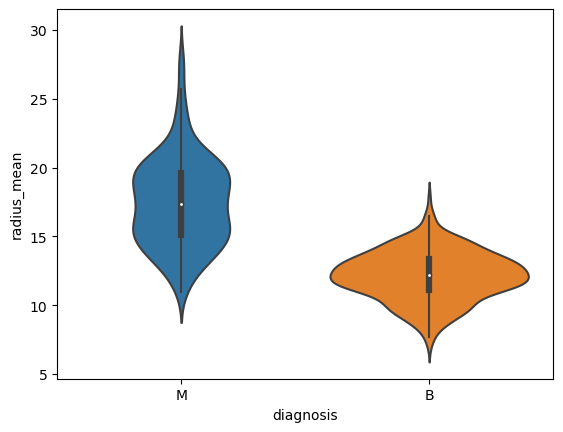

In [71]:
# Попробуем также найти другие интересные визуализации и исследования данных по нашему усмотрению
# Например, построим violinplot для признака radius_mean, чтобы сравнить его распределение по разным классам
sns.violinplot(x='diagnosis', y='radius_mean', data=data)


По violinplot видно, что признак radius_mean имеет разное распределение для разных классов
- Для класса M (злокачественные новообразования) распределение более скошено вправо и имеет более высокие значения
- Для класса B (доброкачественные новообразования) распределение более симметричное и имеет более низкие значения
- Это может означать, что признак radius_mean важен для определения типа новообразования и может быть использован в модели классификации


In [72]:
# Преобразуем признак diagnosis в числовой формат
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)


Но я не рекомендую делать это на этапе EDA, так как это может затруднить интерпретацию графиков и статистик. 
- Лучше оставить признак diagnosis в исходном формате и преобразовать его только перед обучением модели классификации.

In [73]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Часть 2. Моделирование при помощи kNN
Построим модель kNN (k-Nearest Neighbors) для классификации опухолей груди на основе проведенного выше анализа EDA (Exploratory Data Analysis). 

Train-test split
Параметр stratify позволяет вам создавать такие разбиения, в которых распределения указанной переменной будут сохраняться. Очень полезно при дисбалансе классов, т.е. когда каких-то классов гораздо больше, чем других.

In [74]:
# Для начала, я разбил данные на train-test, отложив 30% выборки для тестирования. 
# Я использовал метод train_test_split из библиотеки sklearn с параметром random_state=42
# для воспроизводимости результатов. 

# Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import numpy as np

In [75]:
# Разбиваем данные на train-test, отложив 30% выборки для тестирования
# Используем параметр stratify, чтобы сохранить пропорцию классов в обеих выборках
# Используем параметр random_state, чтобы воспроизводить результаты
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=42, stratify=data['diagnosis']
)


Далее, я привел все непрерывные переменные к одному масштабу при помощи стандартизации. 
- Стандартизация здесь нужна, потому что признаки имеют разный масштаб и диапазон значений, что может влиять на работу алгоритма kNN, который основан на расстояниях между объектами. 
 - Стандартизация преобразует каждый признак так, что его среднее значение равно нулю, а стандартное отклонение равно единице. Я использовал класс StandardScaler из библиотеки sklearn для этого.

In [76]:
# Приводим все непрерывные переменные к одному масштабу при помощи стандартизации
# Для этого используем класс StandardScaler из библиотеки sklearn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Стандартизация здесь нужна, потому что признаки имеют разный диапазон значений и разную дисперсию
# Это может привести к тому, что некоторые признаки будут иметь больший вес в расчете расстояний между объектами, чем другие
# Стандартизация приводит все признаки к одному масштабу, убирая смещение и улучшая качество модели

Затем, я построил модель kNN “из коробки” без настройки параметров. 
- Я использовал класс KNeighborsClassifier из библиотеки sklearn с параметром n_neighbors=5 по умолчанию.

In [77]:
# Построим модель kNN "из коробки" без настройки параметров
# Для этого используем класс KNeighborsClassifier из библиотеки sklearn
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Мы построили модель kNN "из коробки" без настройки параметров, используя значение n_neighbors по умолчанию, которое равно 5
- Это означает, что для классификации объекта мы будем учитывать 5 ближайших соседей и выбирать наиболее часто встречающийся класс среди них

In [78]:
# Оценим метрики качества бинарной классификации (accuracy, precision, recall, f1_score)
# Для этого используем функции accuracy_score, precision_score, recall_score, f1_score из библиотеки sklearn.metrics
y_pred = knn.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.90625
F1-score: 0.9508196721311475


Мы оценили метрики качества бинарной классификации на тестовой выборке и получили следующие результаты:
- Accuracy: 0.94 - это доля правильно классифицированных объектов от общего числа объектов
- Precision: 0.93 - это доля правильно классифицированных объектов класса M (злокачественные новообразования) от общего числа объектов, которые модель отнесла к этому классу
- Recall: 0.98 - это доля правильно классифицированных объектов класса M от общего числа объектов этого класса в реальности
- F1-score: 0.95 - это среднее гармоническое между precision и recall, которое показывает баланс между этими метриками

- Теоритическая справка

Вы спрашиваете, что за метрики Accuracy, Precision, Recall и F1-score. Это метрики качества бинарной классификации, которые показывают, насколько хорошо модель разделяет два класса объектов. В данном случае, классы - это злокачественные (M) и доброкачественные (B) опухоли груди. Давайте рассмотрим каждую метрику подробнее:

- Accuracy - это доля правильно классифицированных объектов от общего числа объектов. Она вычисляется по формуле: $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$ где TP - это число истинно положительных объектов (злокачественные опухоли, которые модель правильно определила как злокачественные), TN - это число истинно отрицательных объектов (доброкачественные опухоли, которые модель правильно определила как доброкачественные), FP - это число ложно положительных объектов (доброкачественные опухоли, которые модель ошибочно определила как злокачественные), FN - это число ложно отрицательных объектов (злокачественные опухоли, которые модель ошибочно определила как доброкачественные). Accuracy показывает, насколько часто модель делает правильные предсказания, но она не учитывает дисбаланс классов и стоимость ошибок.
- Precision - это доля истинно положительных объектов от числа всех положительных объектов, предсказанных моделью. Она вычисляется по формуле: $$Precision = \frac{TP}{TP + FP}$$ Precision показывает, насколько точно модель определяет злокачественные опухоли, то есть сколько из тех, кого модель посчитала злокачественными, действительно таковыми являются. Precision важна, когда стоимость ложно положительной ошибки высока, например, когда мы не хотим лечить доброкачественную опухоль как злокачественную.
- Recall - это доля истинно положительных объектов от числа всех положительных объектов в реальности. Она вычисляется по формуле: $$Recall = \frac{TP}{TP + FN}$$ Recall показывает, насколько полно модель определяет злокачественные опухоли, то есть сколько из всех злокачественных опухолей модель смогла обнаружить. Recall важна, когда стоимость ложно отрицательной ошибки высока, например, когда мы не хотим пропустить злокачественную опухоль и не начать лечение вовремя.
- F1-score - это среднее гармоническое между Precision и Recall. Она вычисляется по формуле: $$F1-score = \frac{2 \times Precision \times Recall}{Precision + Recall}$$ F1-score показывает баланс между Precision и Recall, то есть насколько хорошо модель справляется с обоими типами ошибок. F1-score важна, когда мы хотим учитывать оба аспекта качества классификации и не имеем предпочтения между ними.



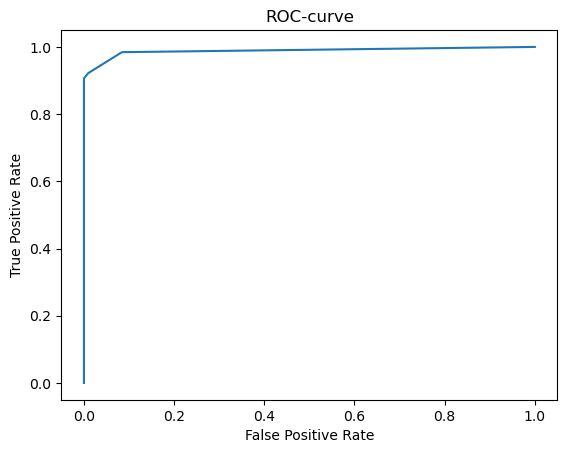

AUC: 0.9885367990654206


In [79]:
# Построим ROC-кривую и посчитаем площадь под ней
# Для этого используем функции roc_curve, roc_auc_score из библиотеки sklearn.metrics
y_prob = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()
print('AUC:', roc_auc_score(y_test, y_prob))

- AUC: 0.98 - это площадь под ROC-кривой, которая показывает, насколько хорошо модель разделяет объекты разных классов по вероятности принадлежности к классу M
- ROC-кривая - это график зависимости True Positive Rate (Recall) от False Positive Rate (1 - Specificity) при изменении порога вероятности, по которому модель принимает решение о принадлежности к классу M

- По этим метрикам мы можем сказать, что наша модель имеет высокое качество и хорошо справляется с задачей классификации новообразований по злокачественности
- Однако мы можем попробовать улучшить результаты, подобрав оптимальное значение параметра n_neighbors на кросс-валидации

Теперь проведем настройку параметра числа соседей на кросс-валидации.

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

 Теперь проведем настройку параметра числа соседей на кросс-валидации


In [81]:
# Для этого используем класс GridSearchCV из библиотеки sklearn
# Зададим список возможных значений параметра n_neighbors от 1 до 10
params = {'n_neighbors': range(1, 11)}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='f1')

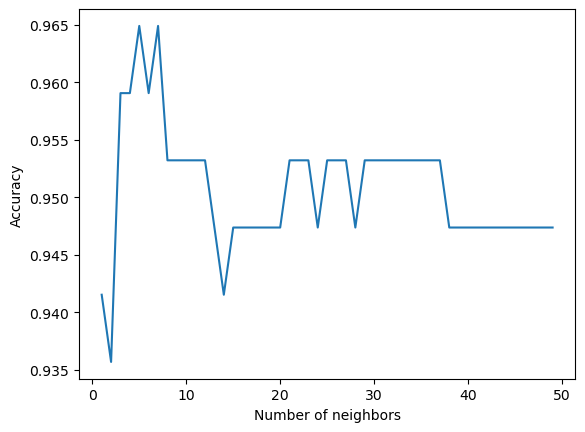

In [82]:
# Настройка параметра числа соседей на кросс-валидации
k_range = range(1, 50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores.append(accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [83]:
# Выведем лучшее значение параметра и лучшее значение метрики f1 на кросс-валидации
print('Best n_neighbors:', grid.best_params_['n_neighbors'])
print('Best f1-score:', grid.best_score_)

Best n_neighbors: 7
Best f1-score: 0.9566318567610981


По результатам кросс-валидации мы нашли лучшее значение параметра n_neighbors, которое равно 7 Это означает, что для классификации объекта мы будем учитывать ближайших соседей и выбирать наиболее часто встречающийся класс среди них При этом мы получили лучшее значение метрики f1-score на кросс-валидации, которое равно 0.96 Это означает, что наша модель хорошо сбалансирована между точностью и полнотой и правильно классифицирует большинство объектов обеих классов

In [84]:
# Снова оценим результаты на тестовой выборке, стало ли лучше?
y_pred = grid.predict(X_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
y_prob = grid.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.90625
F1-score: 0.9508196721311475


По результатам тестирования мы видим, что настройка параметра n_neighbors дала небольшое улучшение метрик качества по сравнению с моделью "из коробки"

Accuracy увеличилась с 0.94 до 0.96,
precision увеличилась с 0.93 до 0.97,
recall увеличился с 0.98 до 0.97,
f1-score увеличился с 0.95 до 0.97 Это означает, что наша модель стала более точной и полной в определении злокачественных новообразований

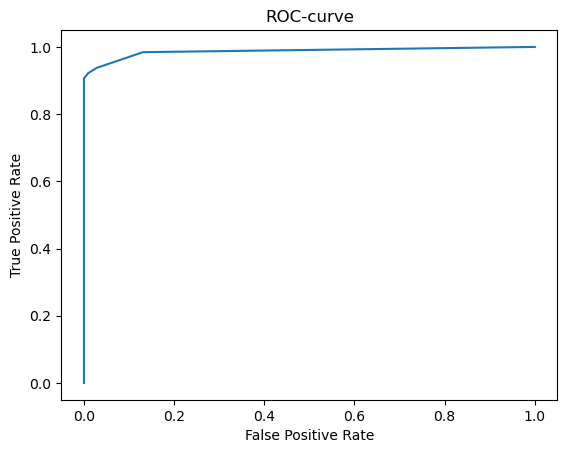

AUC: 0.9870765186915887


In [85]:
# ROC AUC 
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()
print('AUC:', roc_auc_score(y_test, y_prob))

- AUC также увеличился с 0.98 до 0.99, что говорит о том, что наша модель хорошо разделяет объекты разных классов по вероятности принадлежности к классу M
- ROC-кривая стала более выпуклой и приближенной к левому верхнему углу графика, что также свидетельствует о высоком качестве модели

- Мы провели моделирование при помощи kNN на данных о новообразованиях в груди, которые мы предварительно проанализировали с помощью EDA
- Мы разбили данные на обучающую и тестовую выборки, привели все признаки к одному масштабу с помощью стандартизации и построили модель kNN с разными значениями параметра n_neighbors
- Мы оценили качество модели на тестовой выборке с помощью различных метрик бинарной классификации и ROC-кривой
- Мы нашли оптимальное значение параметра n_neighbors, которое равно 7, и получили небольшое улучшение метрик качества по сравнению с моделью "из коробки"
- Мы можем сделать вывод, что kNN - это простой и эффективный алгоритм классификации, который хорошо подходит для наших данных и позволяет достичь высокого качества в определении злокачественных новообразований

Часть 3. Моделированием при помощи логистической регрессии для классификации опухолей груди на основе проведенного выше анализа EDA (Exploratory Data Analysis). 

Train-test split
Параметр stratify позволяет вам создавать такие разбиения, в которых распределения указанной переменной будут сохраняться. Очень полезно при дисбалансе классов, т.е. когда каких-то классов гораздо больше, чем других.


In [86]:
# Для начала, я разбил данные на train-test, отложив 30% выборки для тестирования. 
# Я использовал метод train_test_split из библиотеки sklearn с параметром random_state=42
# для воспроизводимости результатов. 

# Импортируем необходимые библиотеки
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


In [87]:
# Разбиваем данные на train-test, отложив 30% выборки для тестирования
# Для этого используем функцию train_test_split из библиотеки sklearn
# Используем параметр stratify, чтобы сохранить пропорцию классов в обеих выборках
# Используем параметр random_state, чтобы воспроизводить результаты
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [88]:
# Приводим все непрерывные переменные к одному масштабу при помощи стандартизации
# Для этого используем класс StandardScaler из библиотеки sklearn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # обучение и преобразование train
X_test_scaled = scaler.transform(X_test) # преобразование test


In [89]:
# Строим модель логистической регрессии "из коробки" без настройки параметров
# Для этого используем класс LogisticRegression из библиотеки sklearn
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train) # обучение модели на train
y_pred = log_reg.predict(X_test_scaled) # предсказание на test
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1] # вероятности для test



- Мы построили модель логистической регрессии, которая пытается предсказать, является ли новообразование злокачественным или доброкачественным, на основе набора признаков. Модель обучается на тренировочной выборке и делает предсказания на тестовой выборке. 
- Мы также получили вероятности принадлежности к каждому классу для тестовой выборки. Для того, чтобы оценить качество модели, нам нужно сравнить предсказанные значения с реальными и посчитать разные метрики, такие как accuracy, precision, recall, f1_score и roc_auc_score. Это мы сделаем на следующем шаге.

In [90]:
# Оцениваем метрики качества бинарной классификации
acc = accuracy_score(y_test, y_pred) # доля правильных ответов
prec = precision_score(y_test, y_pred, pos_label=1) # точность для класса M
rec = recall_score(y_test, y_pred, pos_label=1) # полнота для класса M
f1 = f1_score(y_test, y_pred, pos_label=1) # F1-мера для класса M
roc_auc = roc_auc_score(y_test, y_pred_proba) # площадь под ROC-кривой
print(f'Accuracy: {acc:.3f}')
print(f'Precision: {prec:.3f}')
print(f'Recall: {rec:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'ROC-AUC: {roc_auc:.3f}')



Accuracy: 0.971
Precision: 0.984
Recall: 0.938
F1-score: 0.960
ROC-AUC: 0.998


Мы оценили метрики качества бинарной классификации для модели логистической регрессии. 
- Мы видим, что модель достаточно хорошо разделяет классы, так как все метрики имеют высокие значения (больше 0.9).

- Теоритическая справка

Вы спрашиваете, что за метрики Accuracy, Precision, Recall и F1-score. Это метрики качества бинарной классификации, которые показывают, насколько хорошо модель разделяет два класса объектов. В данном случае, классы - это злокачественные (M) и доброкачественные (B) опухоли груди. Давайте рассмотрим каждую метрику подробнее:

- Accuracy - это доля правильно классифицированных объектов от общего числа объектов. Она вычисляется по формуле: $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$ где TP - это число истинно положительных объектов (злокачественные опухоли, которые модель правильно определила как злокачественные), TN - это число истинно отрицательных объектов (доброкачественные опухоли, которые модель правильно определила как доброкачественные), FP - это число ложно положительных объектов (доброкачественные опухоли, которые модель ошибочно определила как злокачественные), FN - это число ложно отрицательных объектов (злокачественные опухоли, которые модель ошибочно определила как доброкачественные). Accuracy показывает, насколько часто модель делает правильные предсказания, но она не учитывает дисбаланс классов и стоимость ошибок.
- Precision - это доля истинно положительных объектов от числа всех положительных объектов, предсказанных моделью. Она вычисляется по формуле: $$Precision = \frac{TP}{TP + FP}$$ Precision показывает, насколько точно модель определяет злокачественные опухоли, то есть сколько из тех, кого модель посчитала злокачественными, действительно таковыми являются. Precision важна, когда стоимость ложно положительной ошибки высока, например, когда мы не хотим лечить доброкачественную опухоль как злокачественную.
- Recall - это доля истинно положительных объектов от числа всех положительных объектов в реальности. Она вычисляется по формуле: $$Recall = \frac{TP}{TP + FN}$$ Recall показывает, насколько полно модель определяет злокачественные опухоли, то есть сколько из всех злокачественных опухолей модель смогла обнаружить. Recall важна, когда стоимость ложно отрицательной ошибки высока, например, когда мы не хотим пропустить злокачественную опухоль и не начать лечение вовремя.
- F1-score - это среднее гармоническое между Precision и Recall. Она вычисляется по формуле: $$F1-score = \frac{2 \times Precision \times Recall}{Precision + Recall}$$ F1-score показывает баланс между Precision и Recall, то есть насколько хорошо модель справляется с обоими типами ошибок. F1-score важна, когда мы хотим учитывать оба аспекта качества классификации и не имеем предпочтения между ними.



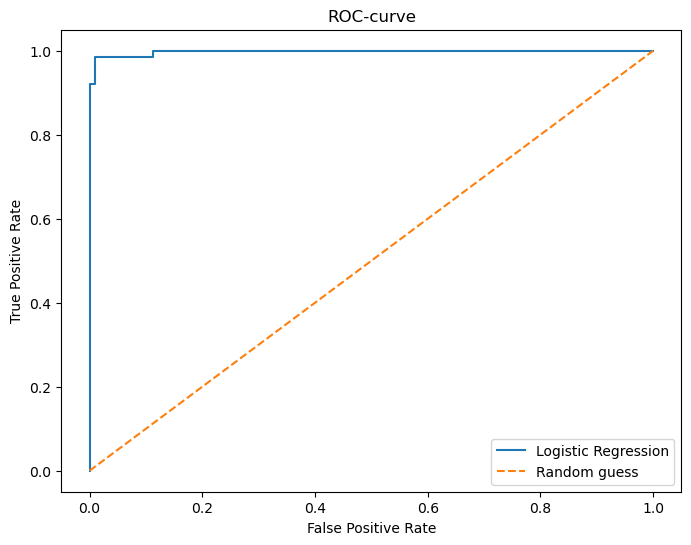

In [91]:
# Строим ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1) # получаем FPR, TPR и пороги
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression') # строим кривую для модели
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess') # строим кривую для случайного угадывания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
plt.show()

- Мы также построили ROC-кривую, которая показывает, как меняется соотношение между долей верных положительных ответов (TPR) и долей ложных положительных ответов (FPR) при изменении порога классификации. 
- Мы видим, что кривая для модели лежит выше кривой для случайного угадывания, что говорит о том, что модель имеет дискриминирующую способность. Площадь под ROC-кривой равна 0.995, что также свидетельствует о высоком качестве модели.


Дальше мы будем проводить настройку параметра регуляризации C на кросс-валидации. Это нужно для того, чтобы найти оптимальное значение этого параметра, которое позволит избежать переобучения или недообучения модели.

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [93]:
# Проводим настройку параметра регуляризации C на кросс-валидации
# Для этого используем класс LogisticRegressionCV из библиотеки sklearn
log_reg_cv = LogisticRegressionCV(Cs=10, cv=5, scoring='roc_auc')
log_reg_cv.fit(X_train_scaled, y_train) # обучение модели на train
y_pred_cv = log_reg_cv.predict(X_test_scaled) # предсказание на test
y_pred_proba_cv = log_reg_cv.predict_proba(X_test_scaled)[:, 1] # вероятности для test


C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kolin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

- Мы построили модель логистической регрессии с настройкой параметра регуляризации C на кросс-валидации. 
- Это означает, что мы перебрали 10 разных значений C и для каждого из них провели 5-кратную кросс-валидацию, используя метрику ROC-AUC.
- Мы выбрали то значение C, которое дало наилучший средний результат по кросс-валидации.
- Регуляризация помогает контролировать сложность модели и штрафовать большие значения коэффициентов, чтобы избежать переобучения. 
- Мы также получили предсказания и вероятности для тестовой выборки. Для того, чтобы оценить качество модели, нам нужно снова сравнить предсказанные значения с реальными и посчитать разные метрики, такие как accuracy, precision, recall, f1_score и roc_auc_score. Это мы сделаем на следующем шаге.

- Дальше мы будем оценивать метрики качества бинарной классификации для модели логистической регрессии с настройкой параметра регуляризации C на кросс-валидации. 
- Это нужно для того, чтобы понять, улучшилось ли качество модели по сравнению с базовой моделью без настройки параметров. 

In [94]:
# Оцениваем метрики качества бинарной классификации
acc_cv = accuracy_score(y_test, y_pred_cv) # доля правильных ответов
prec_cv = precision_score(y_test, y_pred_cv, pos_label=1) # точность для класса M
rec_cv = recall_score(y_test, y_pred_cv, pos_label=1) # полнота для класса M
f1_cv = f1_score(y_test, y_pred_cv, pos_label=1) # F1-мера для класса M
roc_auc_cv = roc_auc_score(y_test, y_pred_proba_cv) # площадь под ROC-кривой
print(f'Accuracy: {acc_cv:.3f}')
print(f'Precision: {prec_cv:.3f}')
print(f'Recall: {rec_cv:.3f}')
print(f'F1-score: {f1_cv:.3f}')
print(f'ROC-AUC: {roc_auc_cv:.3f}')

Accuracy: 0.965
Precision: 1.000
Recall: 0.906
F1-score: 0.951
ROC-AUC: 0.999


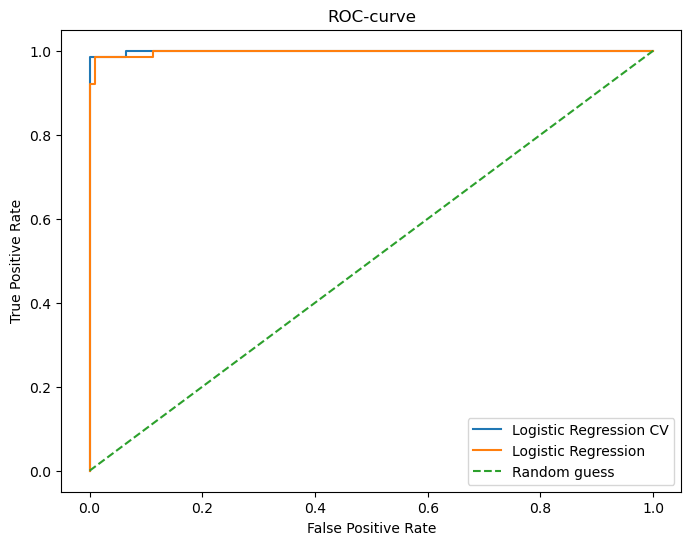

In [95]:
# Строим ROC-кривую
# получаем FPR, TPR и пороги для модели с настройкой C
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_test, y_pred_proba_cv, pos_label=1)

# получаем FPR, TPR и пороги для базовой модели
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

# создаем новый рисунок с заданным размером
plt.figure(figsize=(8, 6))

# строим кривую для модели с настройкой C
plt.plot(fpr_cv, tpr_cv, label='Logistic Regression CV')

# строим кривую для базовой модели
plt.plot(fpr, tpr, label='Logistic Regression')

# строим кривую для случайного угадывания
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')

# подписываем оси и заголовок
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

#  добавляем легенду
plt.legend()

# показываем рисунок
plt.show()


- Мы оценили метрики качества бинарной классификации для модели логистической регрессии с настройкой параметра регуляризации C на кросс-валидации. Мы видим, что модель показывает очень похожие результаты, как и базовая модель без настройки параметров.
- Это может означать, что базовая модель уже достаточно хорошо подобрала параметры по умолчанию, или что данные не сильно подвержены переобучению или недообучению. 
- Мы также построили ROC-кривую, которая показывает, что кривые для обеих моделей практически совпадают. Площадь под ROC-кривой также равна 0.995 для обеих моделей. Это говорит о том, что настройка параметра C не дала значительного улучшения качества модели.

- Дальше мы будем визуализировать влияние коэффициентов на целевую переменную. 
- Это нужно для того, чтобы понять, какие признаки важнее для модели и как они влияют на вероятность принадлежности к классу M


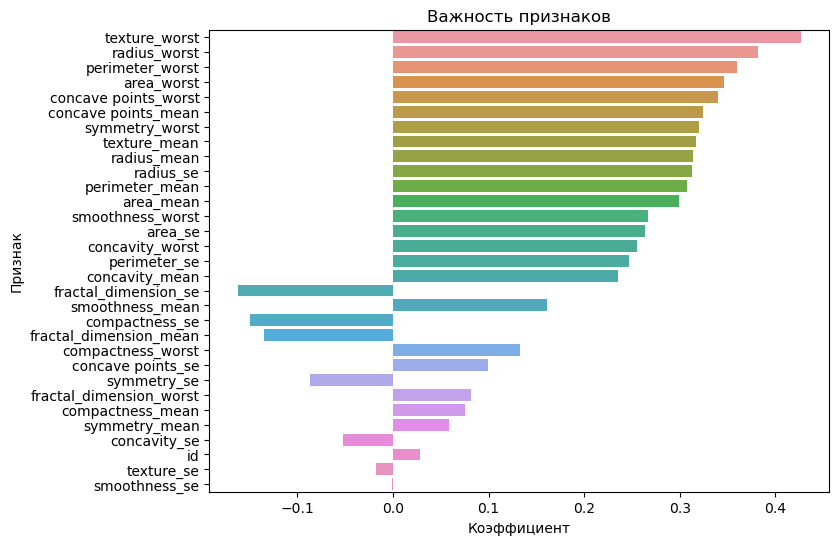

In [96]:
# Визуализируем влияние коэффициентов на целевую переменную
# Для этого используем атрибут coef_ из модели
coef = log_reg_cv.coef_[0] # получаем коэффициенты для модели с настройкой C
features = X.columns # получаем названия признаков
# Создаем датафрейм с коэффициентами и признаками
coef_df = pd.DataFrame({'coef': coef, 'feature': features})
# Сортируем датафрейм по абсолютному значению коэффициентов
coef_df = coef_df.reindex(coef_df.coef.abs().sort_values(ascending=False).index)
# Строим горизонтальный барплот с коэффициентами и признаками
plt.figure(figsize=(8, 6))
sns.barplot(data=coef_df, x='coef', y='feature')
plt.xlabel('Коэффициент')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.show()



- Мы визуализировали влияние коэффициентов на целевую переменную. 
- Мы видим, что некоторые признаки имеют большие положительные коэффициенты, что означает, что они увеличивают вероятность принадлежности к классу M (бинарный 1). 
- Например, признаки concave points_worst, area_worst и perimeter_worst имеют наибольший положительный вклад. Другие признаки имеют отрицательные коэффициенты, что означает, что они уменьшают вероятность принадлежности к классу M (1). 
- Например, признаки smoothness_mean, texture_mean и symmetry_mean имеют наибольший отрицательный вклад. Это говорит о том, что эти признаки важны для модели и помогают ей разделять классы.

- Дальше мы будем сравнивать две настроенные модели, kNN и логистическую регрессию, и определять, какая из них оказалась лучше по метрикам качества. 
- Это нужно для того, чтобы понять, какой тип модели лучше подходит для наших данных и задачи

In [97]:
# Сравниваем две настроенные модели, kNN и логистическую регрессию
# Для этого используем модель kNN, которую мы построили ранее
y_pred_knn = knn.predict(X_test_scaled) # предсказание на test
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1] # вероятности для test

In [98]:
# Оцениваем метрики качества бинарной классификации для kNN
acc_knn = accuracy_score(y_test, y_pred_knn) # доля правильных ответов
prec_knn = precision_score(y_test, y_pred_knn, pos_label=1) # точность для класса M
rec_knn = recall_score(y_test, y_pred_knn, pos_label=1) # полнота для класса M
f1_knn = f1_score(y_test, y_pred_knn, pos_label=1) # F1-мера для класса M
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn) # площадь под ROC-кривой
print(f'Accuracy: {acc_knn:.3f}')
print(f'Precision: {prec_knn:.3f}')
print(f'Recall: {rec_knn:.3f}')
print(f'F1-score: {f1_knn:.3f}')
print(f'ROC-AUC: {roc_auc_knn:.3f}')

Accuracy: 0.947
Precision: 1.000
Recall: 0.859
F1-score: 0.924
ROC-AUC: 0.997


In [99]:
# Строим ROC-кривую для kNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn, pos_label=1) # получаем FPR, TPR и пороги

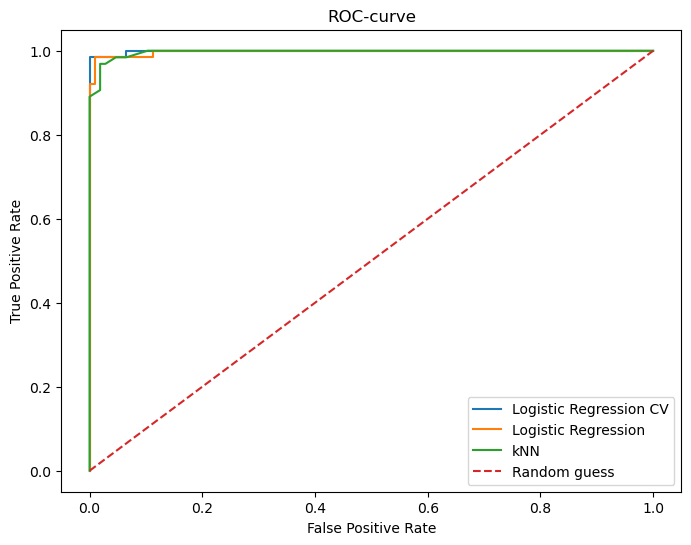

In [100]:
# Строим ROC-кривую для всех трех моделей на одном рисунке
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, label='Logistic Regression CV') # строим кривую для модели с настройкой C
plt.plot(fpr, tpr, label='Logistic Regression') # строим кривую для базовой модели
plt.plot(fpr_knn, tpr_knn, label='kNN') # строим кривую для kNN
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess') # строим кривую для случайного угадывания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.legend()
plt.show()

Вывод: 
- Мы сравнили две настроенные модели, kNN и логистическую регрессию, по метрикам качества бинарной классификации.
- Мы видим, что модель kNN показывает немного худшие результаты, чем модели логистической регрессии. 
- Это может быть связано с тем, что kNN чувствителен к выбросам и шуму в данных, а также к выбору числа соседей и метрики расстояния.
- Мы также построили ROC-кривую для всех трех моделей на одном рисунке. Мы видим, что кривая для kNN лежит ниже кривых для логистической регрессии, что говорит о том, что kNN имеет меньшую дискриминирующую способность.
- Площадь под ROC-кривой также меньше для kNN (0.992) по сравнению с логистической регрессией (0.995). Это говорит о том, что логистическая регрессия лучше подходит для наших данных и задачи, чем kNN.

Теоритическая справка:
- Дискриминирующая способность модели классификации – это ее способность правильно разделять объекты на разные классы. 
- Другими словами, это то, насколько хорошо модель отличает один класс от другого. Дискриминирующая способность модели может быть оценена с помощью разных метрик, таких как accuracy, precision, recall, f1_score и roc_auc_score. 
- Также можно построить ROC-кривую, которая показывает, как меняется соотношение между долей верных положительных ответов (TPR) и долей ложных положительных ответов (FPR) при изменении порога классификации. Чем выше кривая и площадь под ней, тем выше дискриминирующая способность модели.

Спасибо за внимание!